## 5.1 Introduction to maximum likelihood estimation

### 5.1.1 Probability versus Inference

A typical probability problem is as follows. We are planning to run a small clinical study, which involves giving 8 patients a particular drug. We are told that the probability that a single patient experiences a side effect from a particular drug is 0.23. From this information, we can calculate the probability of various complex events occurring. For example, we might want to know the probability that more than 6 of the 8 patients will experience a side effect. Or we might wish to know the probability that none of the 8 patients experience a side effect. Here, we are assuming that a characteristic (parameter) of the population is known. Specifically, we are assuming that we know the true probability of a single patient experiencing a side effect.

Real life is not like that! Typically, in health data science studies, we have observed some data which we believe can be modelled using a particular distribution, but the parameters of that distribution are unknown. For the small clinical study, for example, in real life we would observe how many of the 8 patients did in fact experience a side effect. We might be happy to assume that these data are drawn from a binomial distribution. But the probability of a patient experiencing a side effect - the key parameter of the binomial distribution - would be unknown. The study aim would be to make statements - inferences - about that unknown parameter. So, in some sense, the problem is the opposite way around.

Our task, in statistical inference, is to make statements about the underlying parameter(s) of our proposed model given the observed data. In particular, we typically wish to obtain the best estimate of the unknown parameters. In the simple clinical study, we would want to obtain the best estimate of the unknown probability of experiencing a side effect, given the observed information about how many of the 8 patients did experience a side effect. We also wish to know how well we have estimated the unknown parameter(s): what is the uncertainty associated with our estimate(s)?

The concept of likelihood provides the best single framework for this task. We will see that the likelihood function, often simply called the likelihood, plays a fundamental role in both frequentist and Bayesian inference.


### 5.1.2 Maximum likelihood estimation

Consider the example above, of a small clinical study of 8 patients who are all given a particular drug. The observed data consist of the number, of those 8 patients, who experience a side effect. Suppose that we conduct the study and observe that 2 patients experience a side effect. We wish to use these observed data to make statements - inferences - about the unknown probability of experiencing a side effect from that drug.

**Statistical model:** We begin by defining a model for the data. Here, we define $X$ as the random variable representing the total number of the 8 patients who experience a side effect. Our model is that

$$
X \sim binomial(8, \pi)
$$

which - we remember from the probability sessions - involves the assumptions that each Bernoulli event (whether or not each individual patient experiences a side effect) is independent and has the same probability of occurring.

This model involves the unknown parameter $\pi$.

**Data:** We have observed a realisation from this model, $X=2$. These are often called our observed data.

Under our proposed statistical model, the probability that 2 out of 8 patients experience a side effect is:

$$
P(X=2) = {8 \choose 2} \pi^2 (1-\pi)^6
$$

Since $\pi$ is unknown, it is natural to consider how the probability of observing these data varies with different values of $\pi$:

| $\pi$ |P($X$=$2$)|
|:-----:|:--------:|
| 0     | 0        |
| 0.25  | 0.311    |
| 0.5   | 0.109    |
| 0.75  | 0.004    |
| 1     | 0        |

Suppose that, in truth, the unknown probability of a patient experiencing a side effect from this drug was 0.75. The probability of then observing 2 from 8 patients experiencing a side effect is 0.004. This is a very low probability, so this would be an unusual or perhaps unexpected event, although not strictly impossible.

Suppose that, conversely, the unknown probability of a patient experiencing a side effect from this drug was actually 0.25. Then the probability of observing 2 from 8 patients experiencing a side effect would be 0.31 ($31\%$). If this were the case, there would be nothing unusual or unexpected about our observed data.

We do not know which value of $\pi$ is the true value. But a sensible strategy to obtain a 'best guess', or estimate, of $\pi$, might be to pick the value which maximises the probability of observing the data that we observed. We will see below that this probability is in fact the likelihood, leading to the concept of maximising the likelihood or maximum likelihood. This is a term that you will encounter frequently in statistics.

Following these ideas, we can extend the table above by considering a finer range of possible values for $\pi$ between 0 and 1, and plot the probability of observing $X=2$, assuming that that value of $\pi$ were true. This gives the graph below.


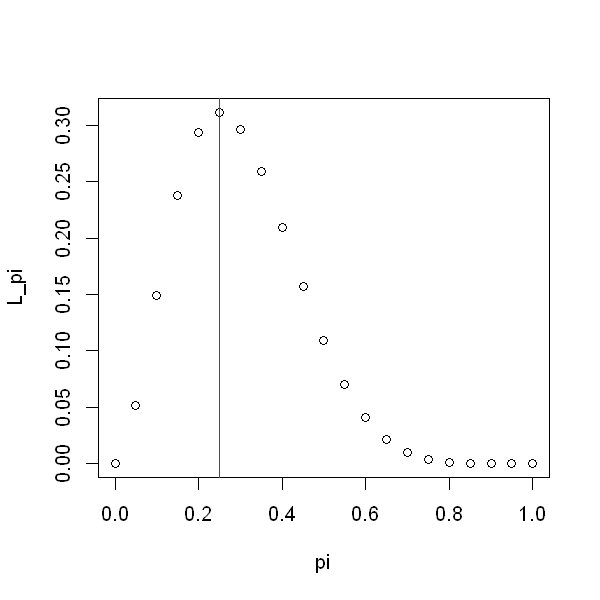

In [1]:
# Define a range of values for pi
pi = seq(0,1,by = 0.05)

# Calculate the likelihood for each value, given n=8 and x=2
L_pi <- choose(8,2)*pi^2*(1-pi)^(8-2)

# Plot the output
options(repr.plot.width=5, repr.plot.height=5)
plot(x = pi, y = L_pi)

# Add a line to indicate the value which yields the highest likelihood
abline(v = pi[which.max(L_pi)], col = "red")

We see that $\pi=0.25$ is the value that leads to the highest probability of observing the data that we did indeed observe (i.e $X=2$) so we choose this value as our best guess for $\pi$. We will see that this value is called the maximum likelihood estimator. We write $\hat{\pi} = 0.25$, where we have added a hat to indicate that this is being viewed as an estimate of an unknown parameter.

The likelihood when $\pi = 0$ is exactly zero, as is the likelihood when $\pi = 1$. This makes sense because these two probabilities would make the observed data impossible - they imply that patients would either *never* or *always* experience side effects. Informally, we could say that these values are *inconsistent* with the data. 

Note that, our estimate of the probability of a patient experiencing a side effect is intuitively a sensible one: it is the sample proportion, $\frac{2}{8}$.

We will see later on that estimators obtained in this way (by maximising a likelihood) have very nice statistical properties.
